In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data=pd.read_csv('breast-cancer-wisconsin-data_data.csv')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.shape

(569, 33)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# Drop unnecessary columns
data.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# Check for duplicate IDs
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows if any
data = data.drop_duplicates()

# Encode the target variable 'diagnosis'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])


Number of duplicate rows: 0


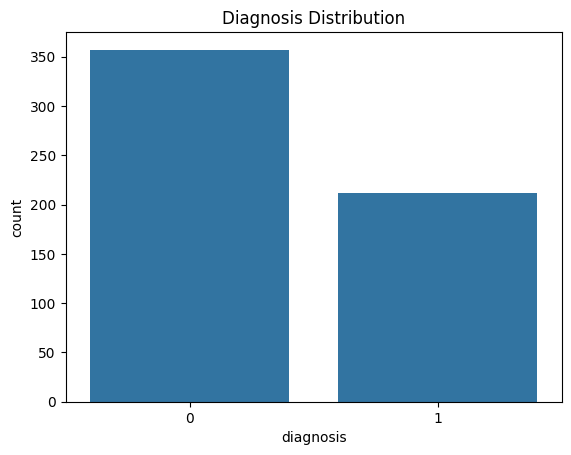

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Distribution')
plt.show()

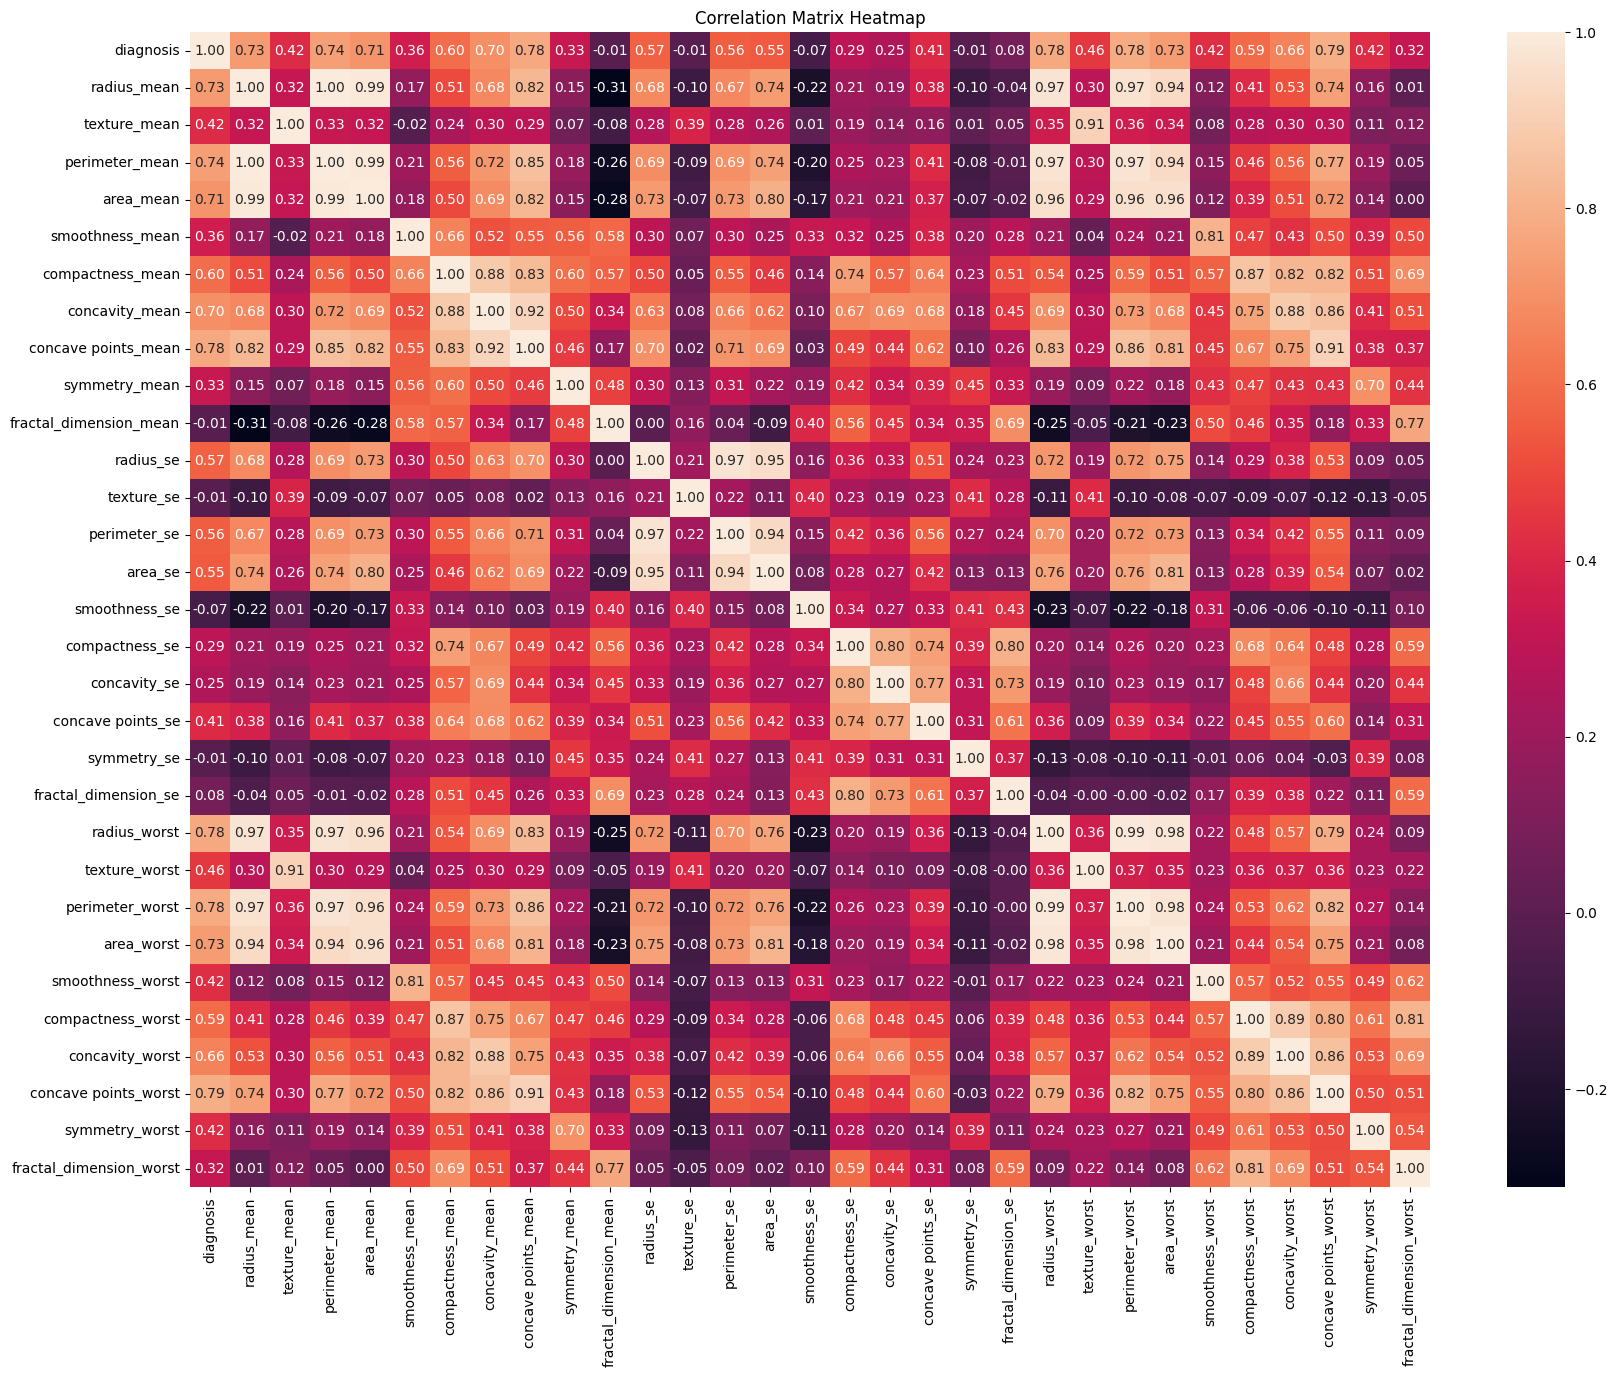

In [11]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

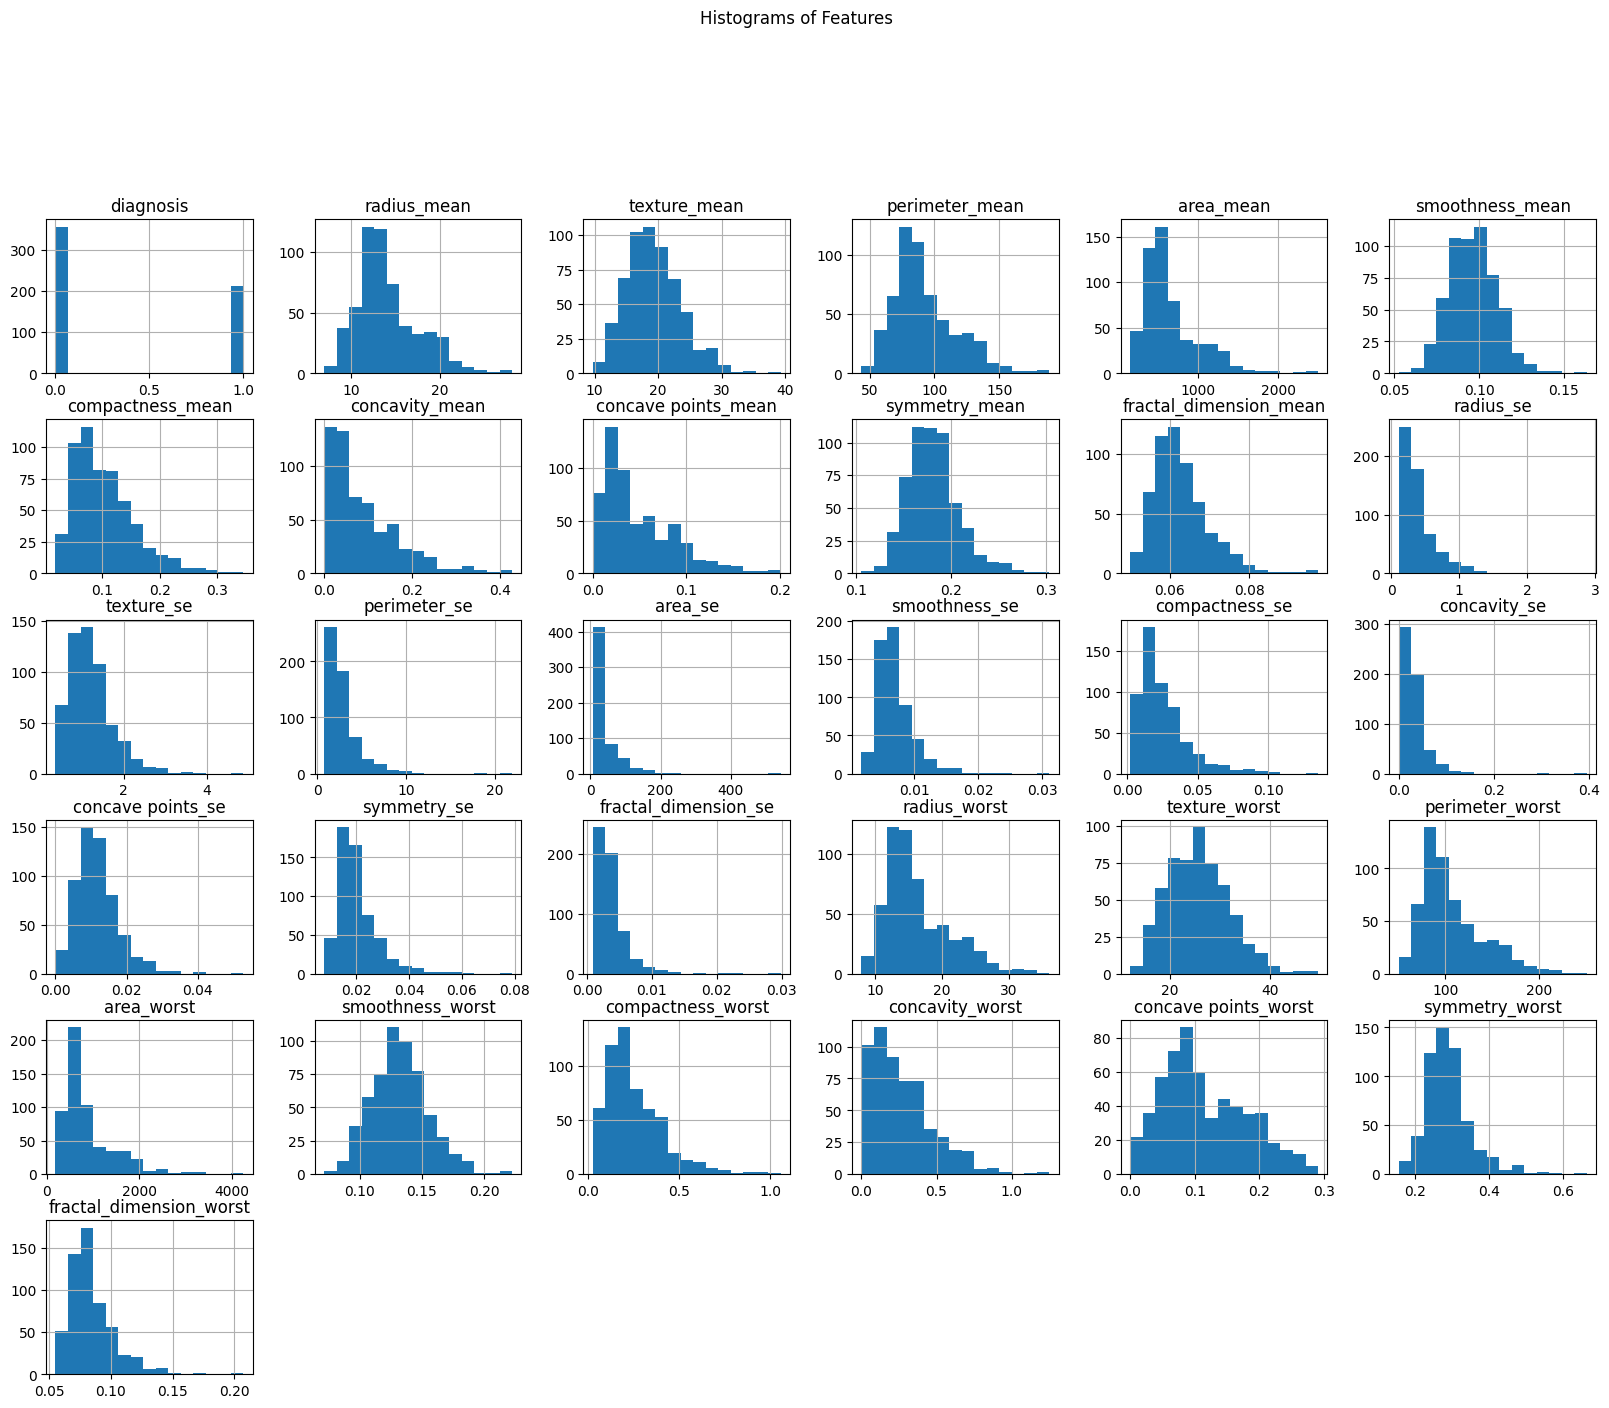

In [12]:
# Plot histograms for each feature
data.hist(bins=15, figsize=(20, 15))
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separating the features and target variable
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Number of samples in X_train: {len(X_train_scaled)}")
print(f"Number of samples in y_train: {len(y_train)}")
print(f"Number of samples in X_test: {len(X_test_scaled)}")
print(f"Number of samples in y_test: {len(y_test)}")


Number of samples in X_train: 455
Number of samples in y_train: 455
Number of samples in X_test: 114
Number of samples in y_test: 114


In [14]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
y_pred_logreg
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_logreg))
print('Accuracy:',accuracy_score(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



c:\Users\Bindu Madhavi V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean') #default n_neighbor is 5 default is minhowski
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_knn))
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[71  0]
 [ 5 38]]
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [16]:
#Ginni index
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_dtree))
print('Accuracy:',accuracy_score(y_test,y_pred_dtree))
print(classification_report(y_test,y_pred_dtree))

[[67  4]
 [ 3 40]]
Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [17]:
#Entropy index
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)
y_pred_dt=dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_dt))
print('Accuracy:',accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[70  1]
 [ 5 38]]
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [18]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=0.001)
clf.fit(X_train,y_train)
y_pred_svm=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[70  1]
 [ 5 38]]
0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10)
rf_classifier.fit(X_train,y_train)
y_pred_rf=rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[69  2]
 [ 3 40]]
0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster=GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)
y_pred_gradboost=gradient_booster.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_gradboost))
print(accuracy_score(y_test,y_pred_gradboost))
print(classification_report(y_test,y_pred_gradboost))

[[69  2]
 [ 3 40]]
0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [21]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred_abc=abc.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_abc))
print(accuracy_score(y_test,y_pred_abc))
print(classification_report(y_test,y_pred_abc))

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



c:\Users\Bindu Madhavi V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [22]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 11.2 MB/s eta 0:00:12
   - -------------------------------------- 4.5/124.9 MB 11.7 MB/s eta 0:00:11
   -- ------------------------------------- 7.1/124.9 MB 11.8 MB/s eta 0:00:10
   --- ------------------------------------ 9.7/124.9 MB 11.6 MB/s eta 0:00:10
   --- ------------------------------------ 12.1/124.9 MB 11.6 MB/s eta 0:00:10
   ---- ----------------------------------- 14.7/124.9 MB 11.7 MB/s eta 0:00:10
   ----- ---------------------------------- 17.0/124.9 MB 11.7 MB/s eta 0:00:10
   ------ --------------------------------- 19.7/124.9 MB 11.7 MB/s eta 0:00:09
   ------- -------------------------------- 22.0/124.9 MB 11.7 MB/s eta 0:00:09
   ------- -------------------------------- 24.4/124.9 MB 11.6 MB/s eta 0:00:09
   -------- ------------------------------- 26.7/124.9 MB 11.7 MB/s eta 0:00:09
   --------- ------------------------------ 29.6/124.

In [23]:
from xgboost import XGBClassifier
model=XGBClassifier(learning_rate=1)
model.fit(X_train,y_train)
y_pred_xgb=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[69  2]
 [ 3 40]]
0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [24]:
pip install catboost

  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
    --------------------------------------- 2.1/101.7 MB 11.8 MB/s eta 0:00:09
   - -------------------------------------- 4.2/101.7 MB 11.0 MB/s eta 0:00:09
   -- ------------------------------------- 7.1/101.7 MB 11.8 MB/s eta 0:00:09
   --- ------------------------------------ 8.9/101.7 MB 10.9 MB/s eta 0:00:09
   ---- ----------------------------------- 11.0/101.7 MB 10.7 MB/s eta 0:00:09
   ----- ---------------------------------- 13.4/101.7 MB 10.6 MB/s eta 0:00:09
   ------ --------------------------------- 15.7/101.7 MB 10.8 MB/s eta 0:00:08
   ------- -------------------------------- 18.4/101.7 MB 10.8 MB/s eta 0:00:08
   -------- ------------------------------- 20.4/101.7 MB 10.8 MB/s eta 0:00:08
   -------- ------------------------------- 22.8/101.7 MB 10.8 MB/s eta 0:00:08
   --------- ------------------------------ 25.4/101.7 MB 10.9 MB/s 

In [25]:
from catboost import CatBoostClassifier
model1=CatBoostClassifier()
model1.fit(X_train,y_train)
y_pred_cat=model1.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_cat))
print(accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))

Learning rate set to 0.00736
0:	learn: 0.6812589	total: 169ms	remaining: 2m 49s
1:	learn: 0.6692348	total: 185ms	remaining: 1m 32s
2:	learn: 0.6583753	total: 194ms	remaining: 1m 4s
3:	learn: 0.6481894	total: 202ms	remaining: 50.3s
4:	learn: 0.6375033	total: 208ms	remaining: 41.4s
5:	learn: 0.6283885	total: 215ms	remaining: 35.6s
6:	learn: 0.6165743	total: 221ms	remaining: 31.3s
7:	learn: 0.6064453	total: 226ms	remaining: 28s
8:	learn: 0.5955410	total: 233ms	remaining: 25.6s
9:	learn: 0.5862461	total: 239ms	remaining: 23.6s
10:	learn: 0.5759000	total: 245ms	remaining: 22s
11:	learn: 0.5665579	total: 250ms	remaining: 20.6s
12:	learn: 0.5565177	total: 254ms	remaining: 19.3s
13:	learn: 0.5480506	total: 261ms	remaining: 18.4s
14:	learn: 0.5396308	total: 266ms	remaining: 17.5s
15:	learn: 0.5311838	total: 272ms	remaining: 16.7s
16:	learn: 0.5238098	total: 278ms	remaining: 16.1s
17:	learn: 0.5156037	total: 282ms	remaining: 15.4s
18:	learn: 0.5084232	total: 286ms	remaining: 14.7s
19:	learn: 0.5

In [26]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_logreg,y_pred_knn,y_pred_dt,y_pred_dtree,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[71  0]
 [ 3 40]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [27]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_logreg,y_pred_knn,y_pred_dt,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[71  0]
 [ 3 40]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [28]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_rf,y_pred_gradboost,y_pred_abc,y_pred_xgb,y_pred_cat]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [29]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_cat,y_pred_logreg,y_pred_abc,y_pred_xgb,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [30]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_cat,y_pred_logreg,y_pred_dtree,y_pred_xgb,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [31]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_cat,y_pred_logreg,y_pred_rf,y_pred_xgb,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [32]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_cat,y_pred_logreg,y_pred_knn,y_pred_xgb,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 1 42]]
0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [33]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_cat,y_pred_logreg,y_pred_dt,y_pred_xgb,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[71  0]
 [ 2 41]]
0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [41]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_dtree,y_pred_dt,y_pred_knn,y_pred_abc,y_pred_xgb]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 1 42]]
0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [42]:
import pickle

# Save the model to a pickle file
with open('ml.pkl', 'wb') as file:
    pickle.dump(meta_learner, file)
import pickle

# Load the model from the pickle file
with open('ml.pkl', 'rb') as file:
    meta_learner = pickle.load(file)